In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "liguria"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,7,Liguria,1,0,1,0,1,1,1,...,0.0,38.0,0.0,0.0,0.00,100.00,2.63,0.00,0.00,0.000
1,2020-02-26T18:00:00,7,Liguria,6,0,6,5,11,10,10,...,0.0,27.0,0.0,5.0,0.00,54.55,37.04,0.00,0.00,1000.000
2,2020-02-27T18:00:00,7,Liguria,9,0,9,10,19,8,8,...,0.0,12.0,0.0,5.0,0.00,47.37,66.67,0.00,0.00,72.727
3,2020-02-28T18:00:00,7,Liguria,9,0,9,10,19,0,0,...,0.0,34.0,0.0,0.0,0.00,47.37,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,7,Liguria,4,1,5,33,38,19,23,...,0.0,9.0,0.0,23.0,20.00,13.16,255.56,0.00,0.00,121.053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2020-11-18T17:00:00,7,Liguria,1371,118,1489,15279,16768,237,775,...,19.0,6806.0,2402.0,258.0,7.92,8.88,11.39,32.26,0.85,4.688
268,2020-11-19T17:00:00,7,Liguria,1319,119,1438,15589,17027,259,792,...,15.0,6187.0,2098.0,310.0,8.28,8.45,12.80,37.75,0.85,4.723
269,2020-11-20T17:00:00,7,Liguria,1290,120,1410,14544,15954,-1073,761,...,29.0,5647.0,2131.0,-1045.0,8.51,8.84,13.48,35.71,0.84,4.469
270,2020-11-21T17:00:00,7,Liguria,1241,119,1360,14513,15873,-81,761,...,20.0,6476.0,2191.0,-31.0,8.75,8.57,11.75,34.73,-0.83,4.770


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 22, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 611
Nuovi tamponi: 4428.0
Percentuale nuovi positivi/nuovi tamponi: 13.8 %
Nuovi guariti: 592.0
Nuovi deceduti: 14.0
Variazione positivi ricoverati con sintomi: 12.0
Variazione positivi in terapia intensiva: 3.0
Variazione positivi in isolamento dimiciliare: -10.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 22, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-23T17:00:00,7,Liguria,149,18,167,1426,1593,63,108,...,2.0,3766.0,1938.0,61.0,10.78,10.48,2.87,5.57,5.88,7.059
1,2020-09-24T17:00:00,7,Liguria,153,18,171,1483,1654,61,102,...,2.0,2991.0,1594.0,57.0,10.53,10.34,3.41,6.40,0.00,6.403
2,2020-09-25T17:00:00,7,Liguria,145,17,162,1564,1726,72,73,...,1.0,2753.0,1367.0,81.0,10.49,9.39,2.65,5.34,-5.56,4.414
3,2020-09-26T17:00:00,7,Liguria,136,19,155,1582,1737,11,97,...,2.0,3016.0,1565.0,18.0,12.26,8.92,3.22,6.20,11.76,5.620
4,2020-09-27T17:00:00,7,Liguria,137,22,159,1579,1738,1,45,...,0.0,1908.0,892.0,-3.0,13.84,9.15,2.36,5.04,15.79,2.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-18T17:00:00,7,Liguria,1371,118,1489,15279,16768,237,775,...,19.0,6806.0,2402.0,258.0,7.92,8.88,11.39,32.26,0.85,4.688
57,2020-11-19T17:00:00,7,Liguria,1319,119,1438,15589,17027,259,792,...,15.0,6187.0,2098.0,310.0,8.28,8.45,12.80,37.75,0.85,4.723
58,2020-11-20T17:00:00,7,Liguria,1290,120,1410,14544,15954,-1073,761,...,29.0,5647.0,2131.0,-1045.0,8.51,8.84,13.48,35.71,0.84,4.469
59,2020-11-21T17:00:00,7,Liguria,1241,119,1360,14513,15873,-81,761,...,20.0,6476.0,2191.0,-31.0,8.75,8.57,11.75,34.73,-0.83,4.770


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

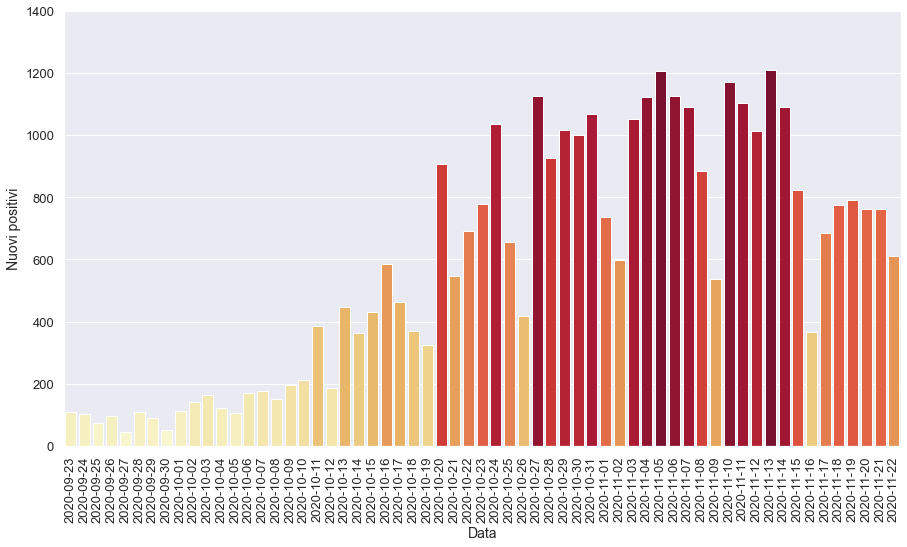

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

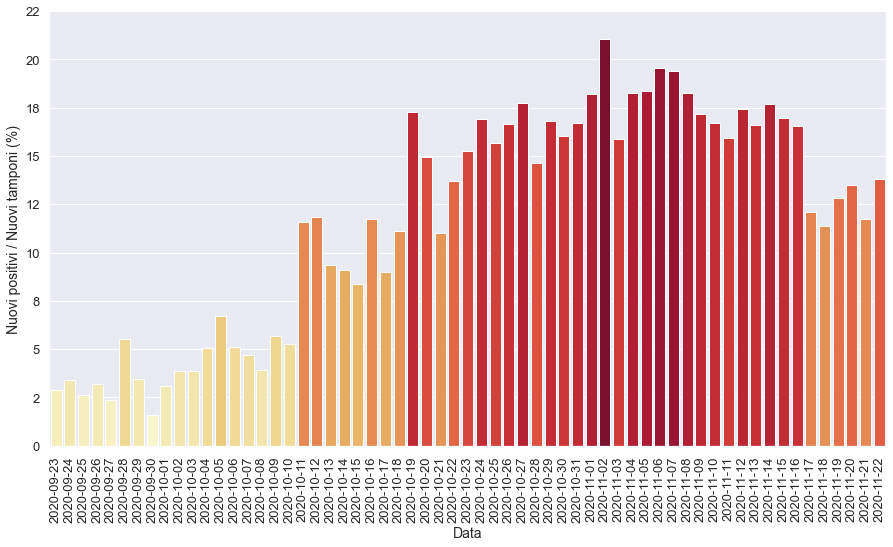

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

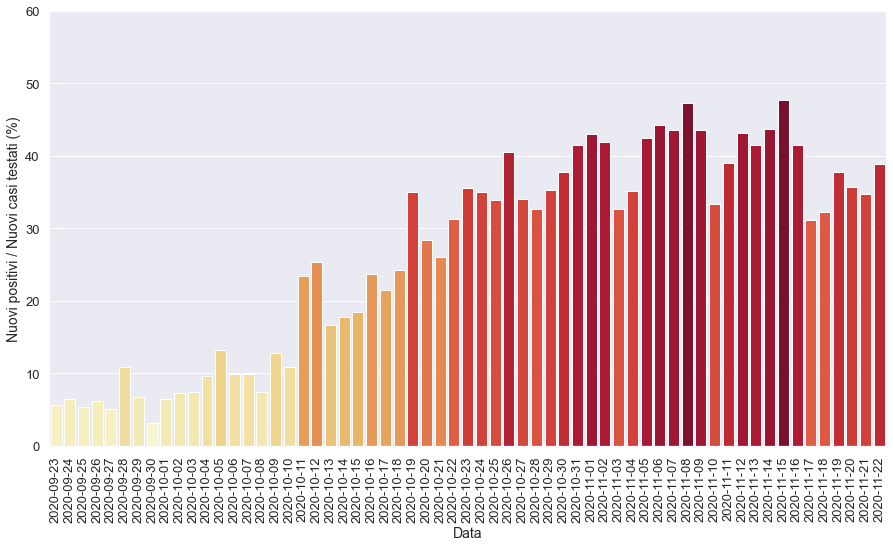

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

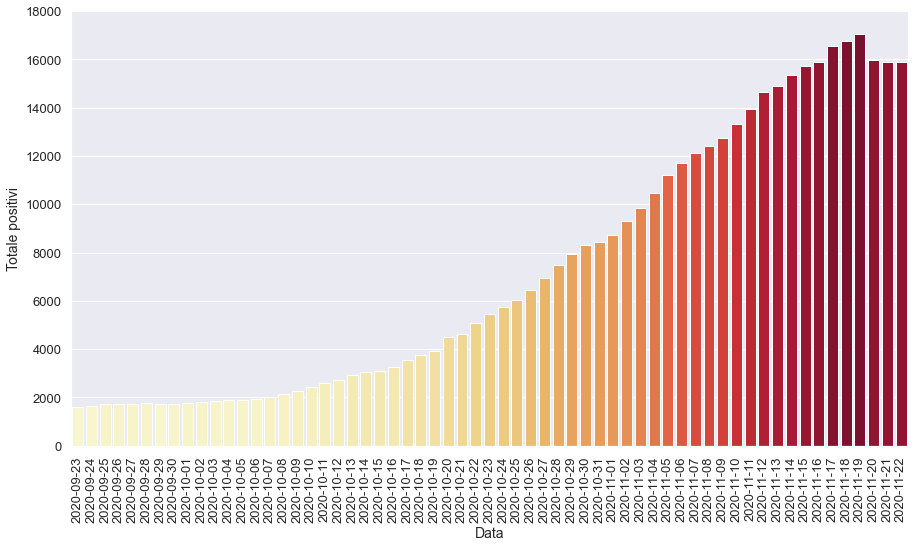

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

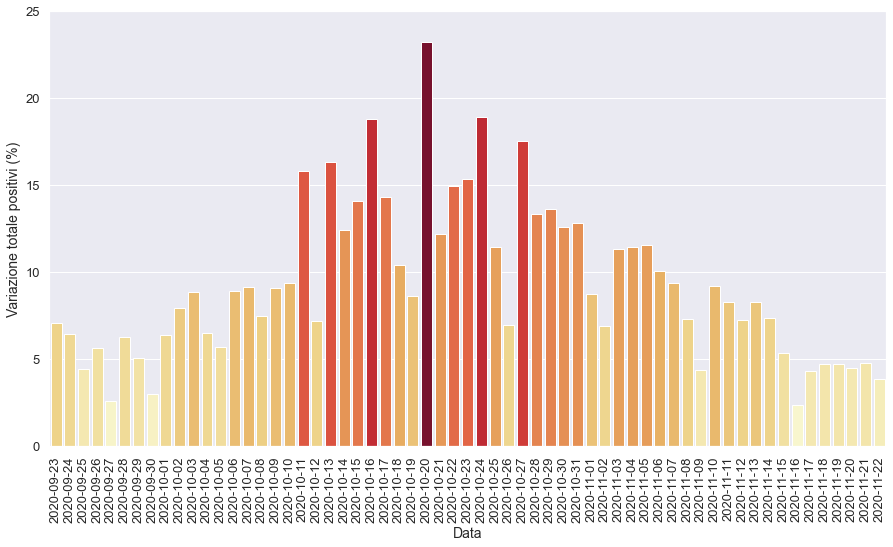

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

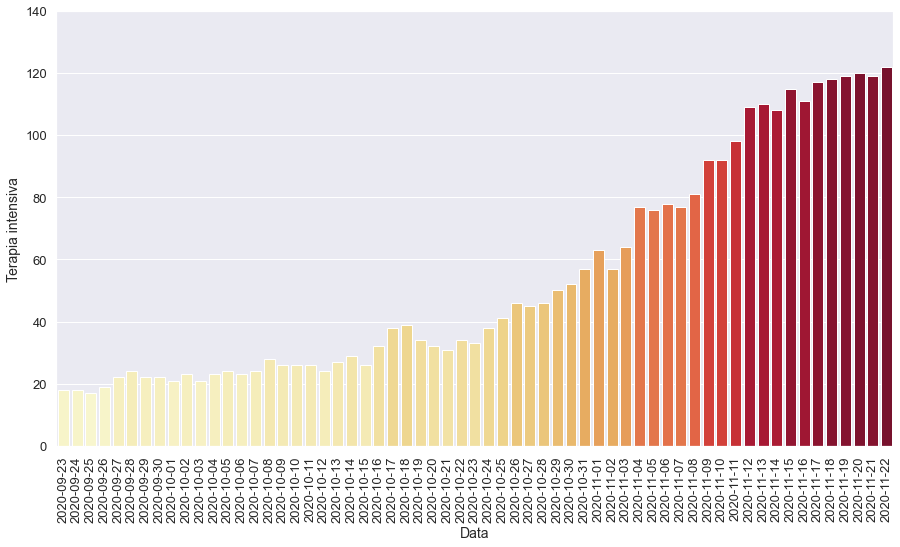

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

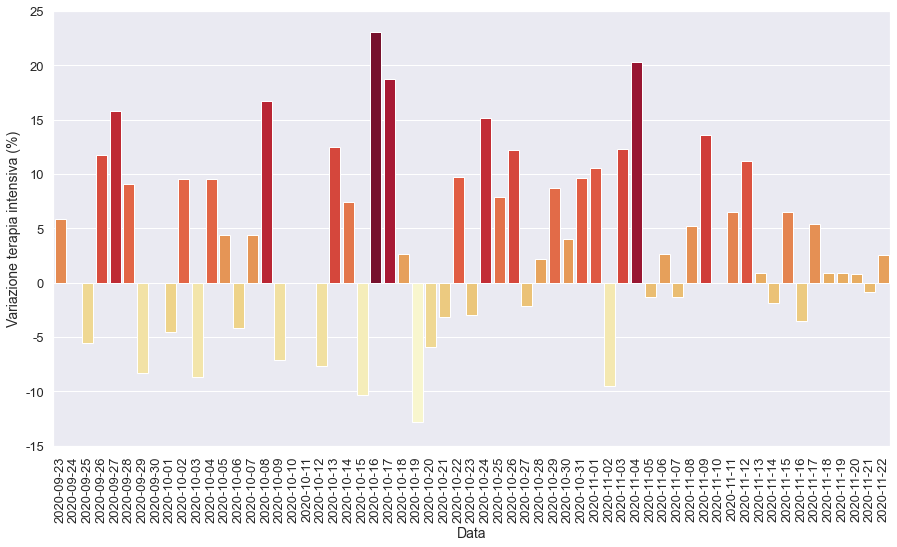

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

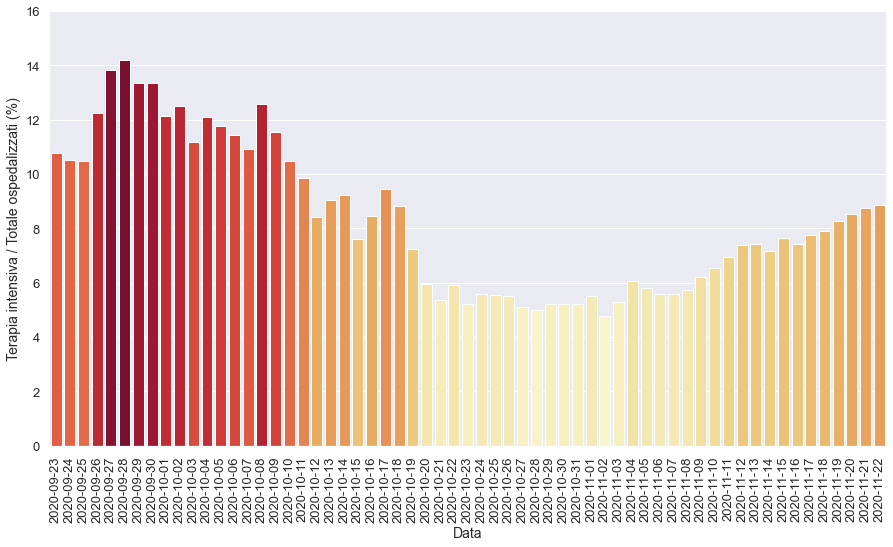

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

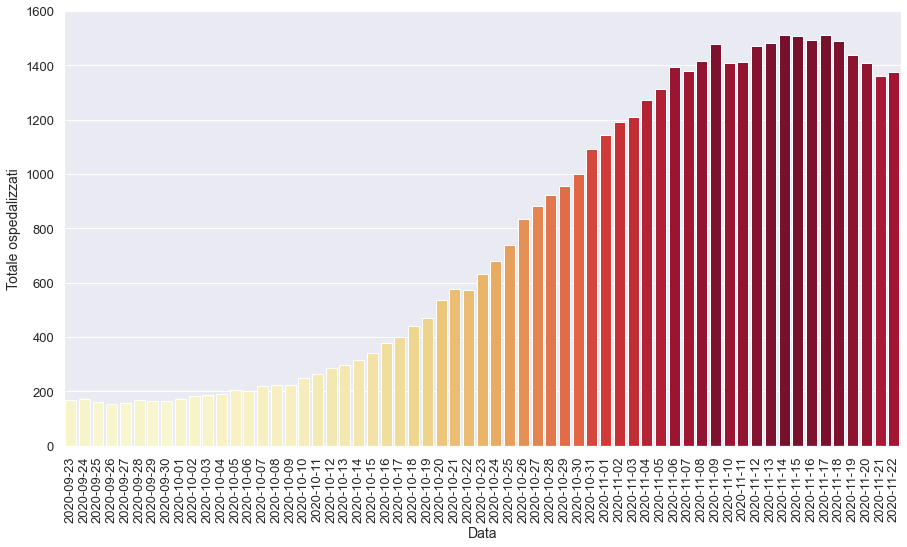

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

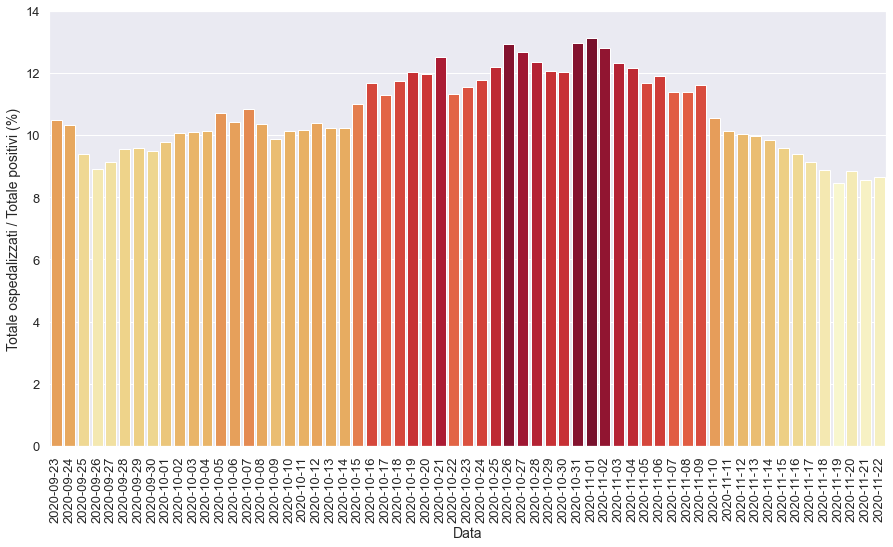

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

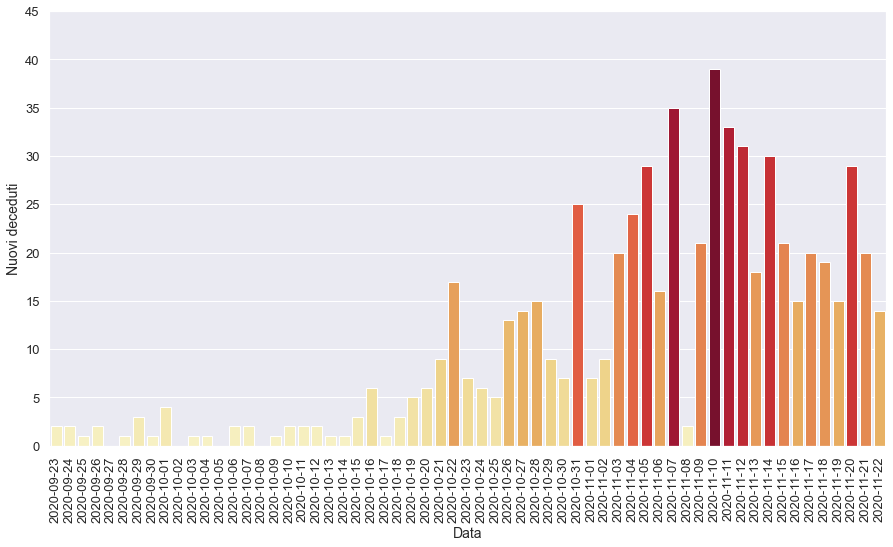

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

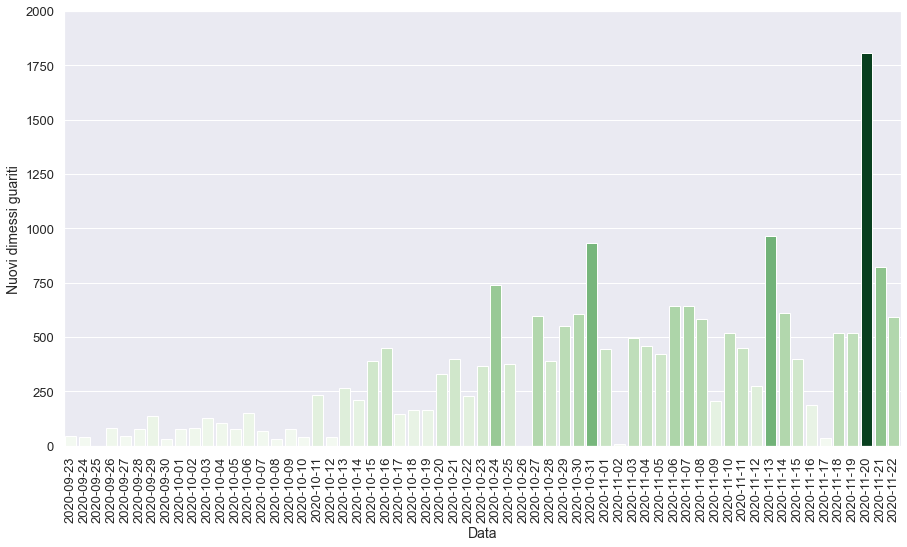

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-23T17:00:00,7,Liguria,598,33,631,4838,5469,403,778,...,7.0,5096.0,2186.0,346.0,5.23,11.54,15.27,35.59,-2.94,15.357
1,2020-10-24T17:00:00,7,Liguria,641,38,679,5081,5760,291,1035,...,6.0,6114.0,2951.0,243.0,5.60,11.79,16.93,35.07,15.15,18.925
2,2020-10-25T17:00:00,7,Liguria,696,41,737,5299,6036,276,657,...,5.0,4195.0,1938.0,218.0,5.56,12.21,15.66,33.90,7.89,11.406
3,2020-10-26T17:00:00,7,Liguria,788,46,834,5608,6442,406,419,...,13.0,2519.0,1034.0,309.0,5.52,12.95,16.63,40.52,12.20,6.942
4,2020-10-27T17:00:00,7,Liguria,837,45,882,6075,6957,515,1127,...,14.0,6357.0,3306.0,467.0,5.10,12.68,17.73,34.09,-2.17,17.495
5,2020-10-28T17:00:00,7,Liguria,878,46,924,6554,7478,521,926,...,15.0,6340.0,2837.0,479.0,4.98,12.36,14.61,32.64,2.22,13.310
6,2020-10-29T17:00:00,7,Liguria,907,50,957,6979,7936,458,1018,...,9.0,6067.0,2882.0,425.0,5.22,12.06,16.78,35.32,8.70,13.613
7,2020-10-30T17:00:00,7,Liguria,948,52,1000,7322,8322,386,999,...,7.0,6234.0,2644.0,343.0,5.20,12.02,16.03,37.78,4.00,12.588
8,2020-10-31T17:00:00,7,Liguria,1036,57,1093,7338,8431,109,1068,...,25.0,6389.0,2569.0,16.0,5.22,12.96,16.72,41.57,9.62,12.833
9,2020-11-01T17:00:00,7,Liguria,1080,63,1143,7571,8714,283,736,...,7.0,4044.0,1709.0,233.0,5.51,13.12,18.20,43.07,10.53,8.730


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

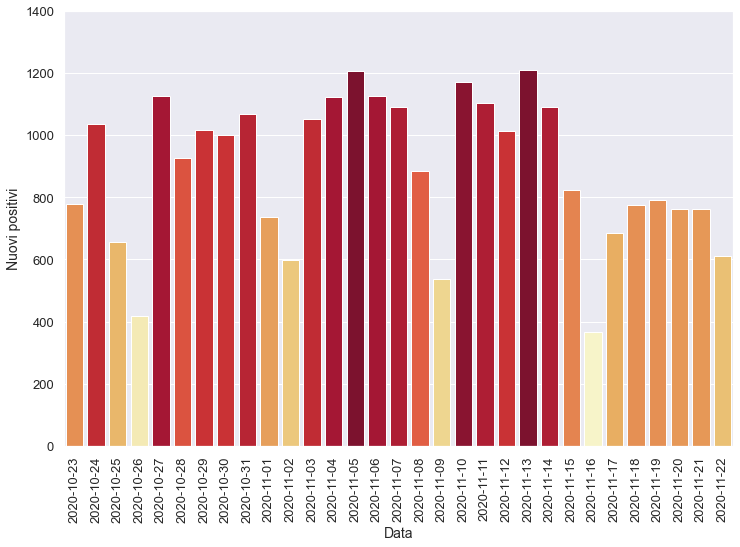

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

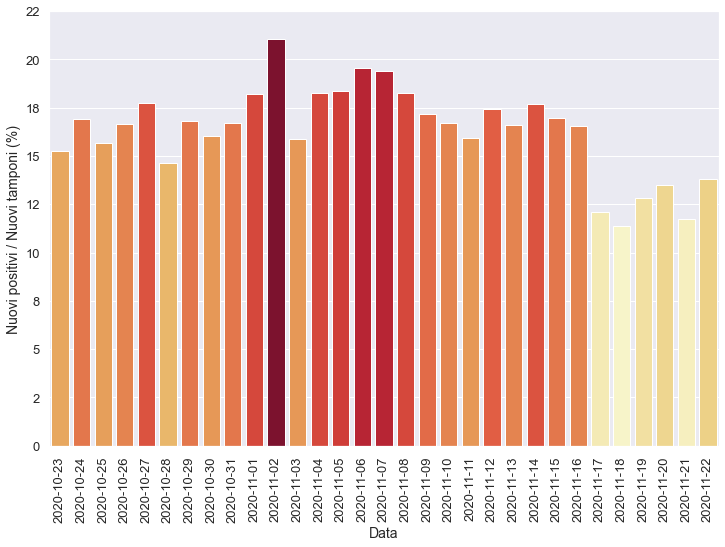

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

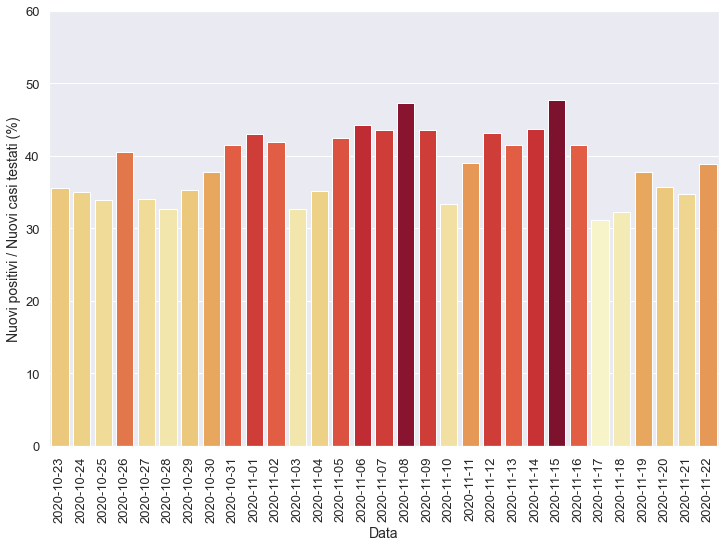

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

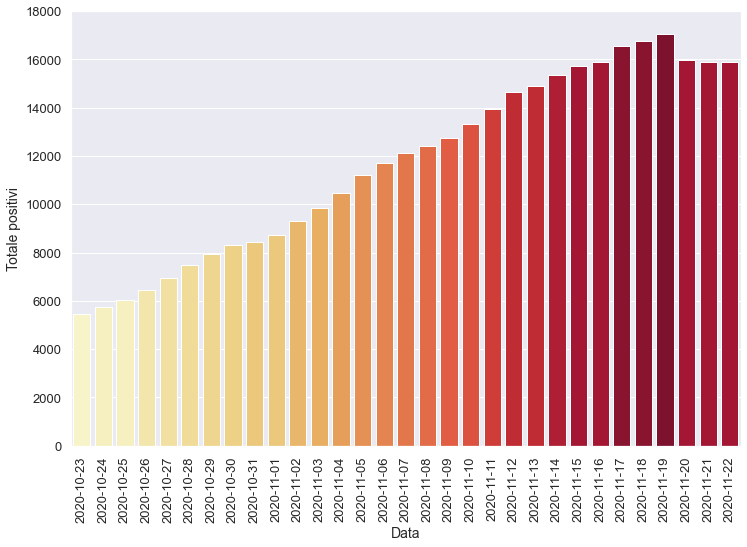

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

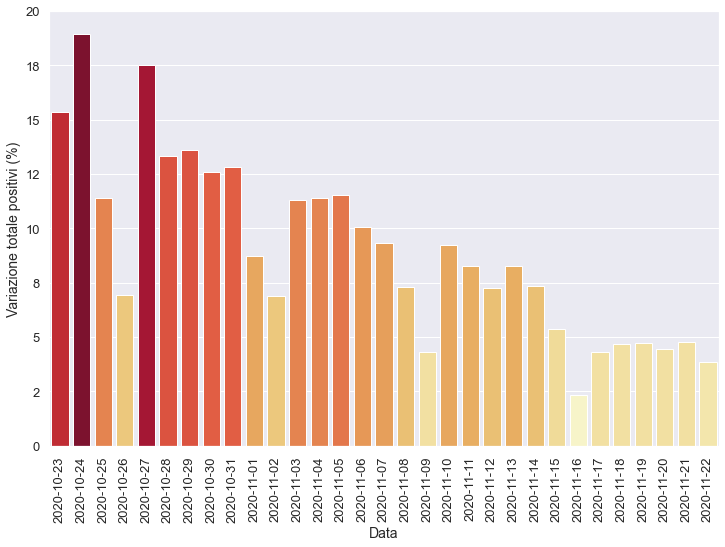

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

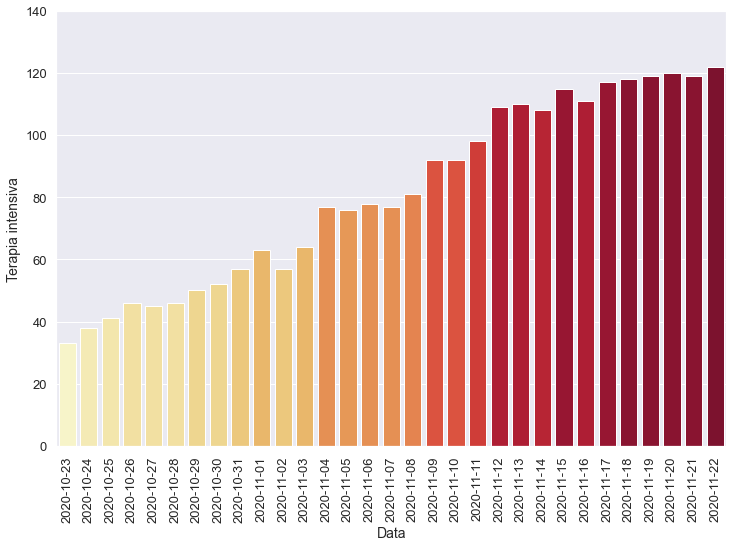

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

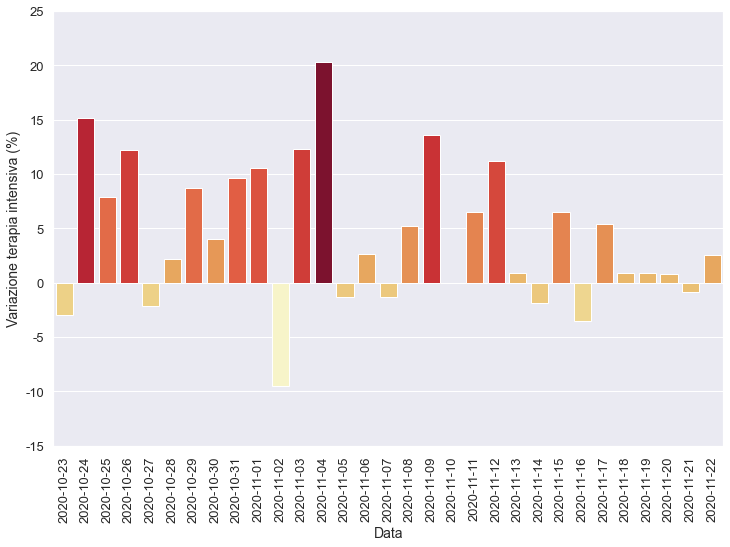

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

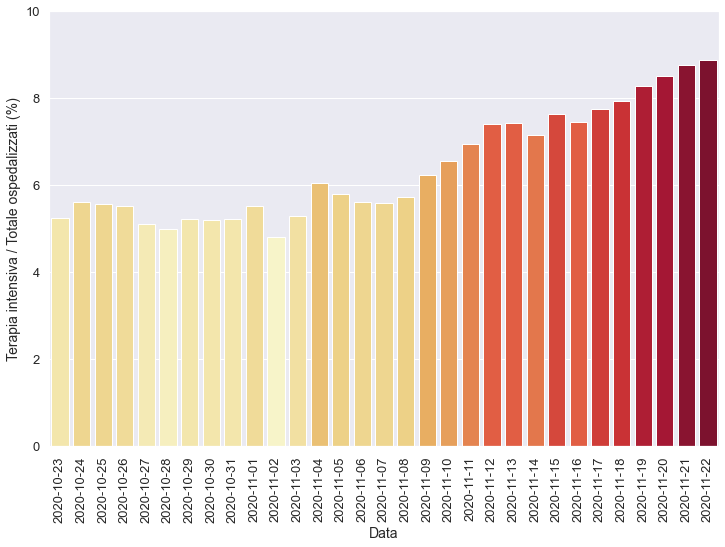

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

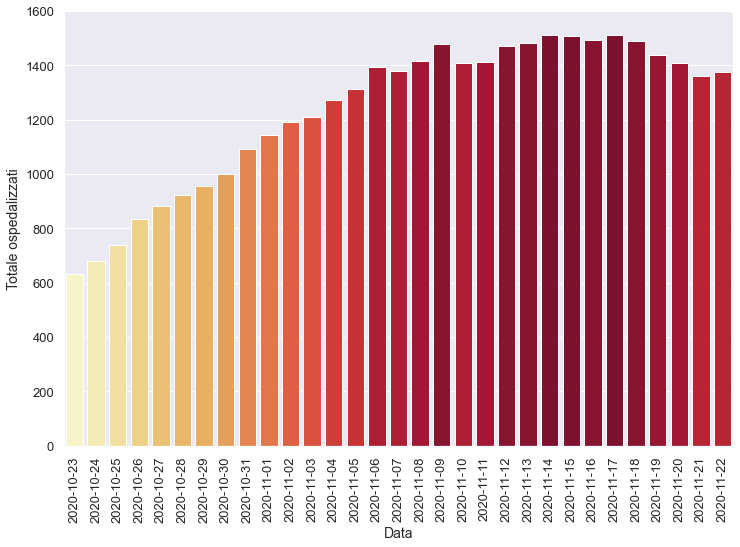

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

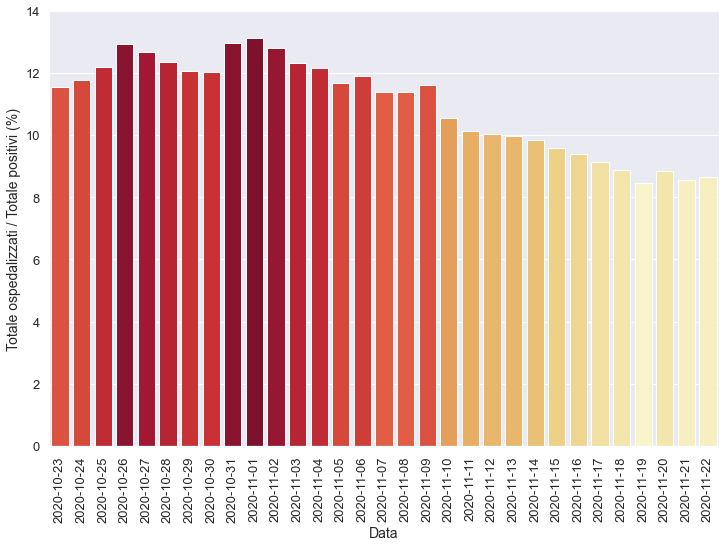

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

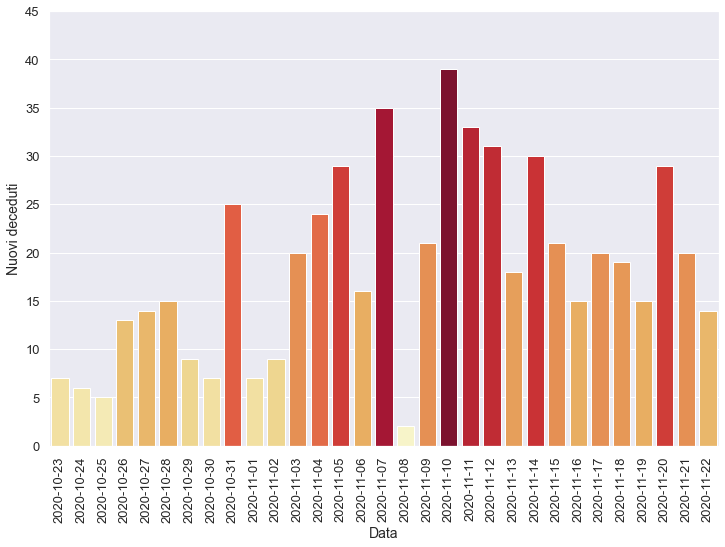

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

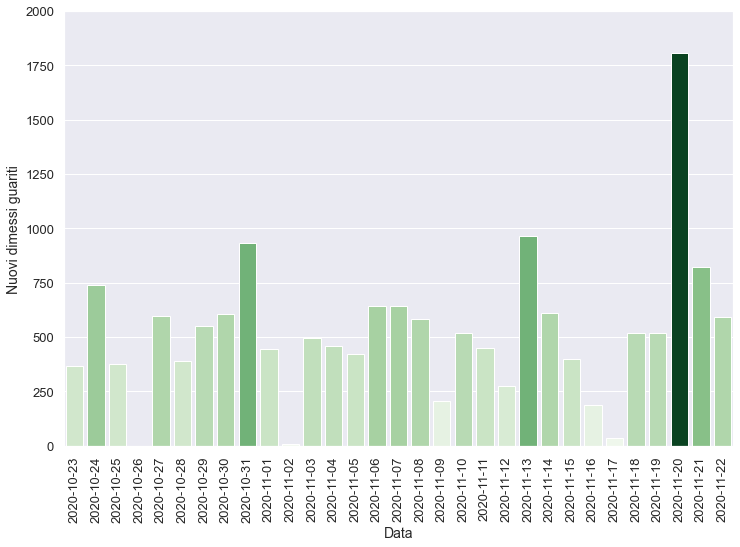

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-15T17:00:00,7,Liguria,1393,115,1508,14230,15738,404,822,...,21.0,4850.0,1724.0,406.0,7.63,9.58,16.95,47.68,6.48,5.361
1,2020-11-16T17:00:00,7,Liguria,1381,111,1492,14409,15901,163,365,...,15.0,2205.0,880.0,179.0,7.44,9.38,16.55,41.48,-3.48,2.319
2,2020-11-17T17:00:00,7,Liguria,1393,117,1510,15021,16531,630,685,...,20.0,5670.0,2198.0,612.0,7.75,9.13,12.08,31.16,5.41,4.308
3,2020-11-18T17:00:00,7,Liguria,1371,118,1489,15279,16768,237,775,...,19.0,6806.0,2402.0,258.0,7.92,8.88,11.39,32.26,0.85,4.688
4,2020-11-19T17:00:00,7,Liguria,1319,119,1438,15589,17027,259,792,...,15.0,6187.0,2098.0,310.0,8.28,8.45,12.80,37.75,0.85,4.723
5,2020-11-20T17:00:00,7,Liguria,1290,120,1410,14544,15954,-1073,761,...,29.0,5647.0,2131.0,-1045.0,8.51,8.84,13.48,35.71,0.84,4.469
6,2020-11-21T17:00:00,7,Liguria,1241,119,1360,14513,15873,-81,761,...,20.0,6476.0,2191.0,-31.0,8.75,8.57,11.75,34.73,-0.83,4.770
7,2020-11-22T17:00:00,7,Liguria,1253,122,1375,14503,15878,5,611,...,14.0,4428.0,1571.0,-10.0,8.87,8.66,13.80,38.89,2.52,3.849


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

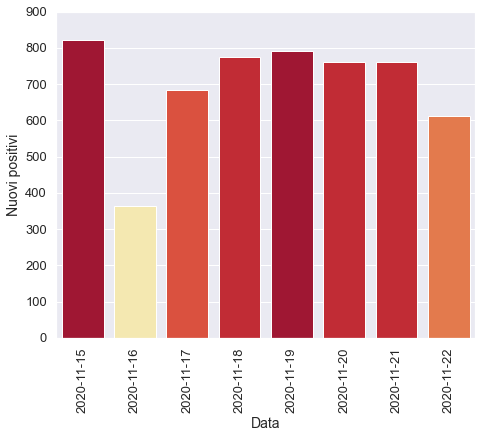

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

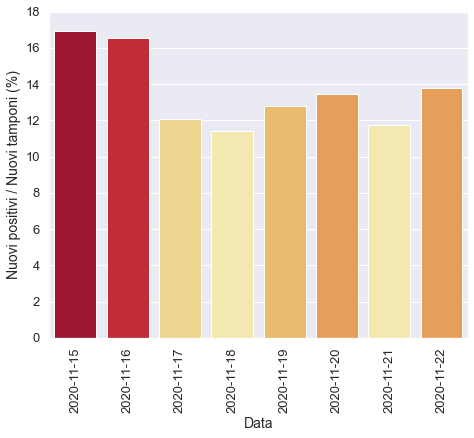

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

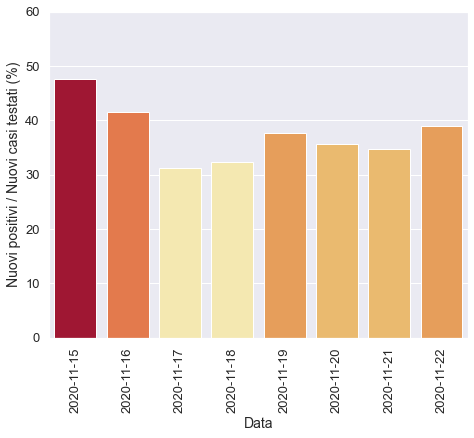

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

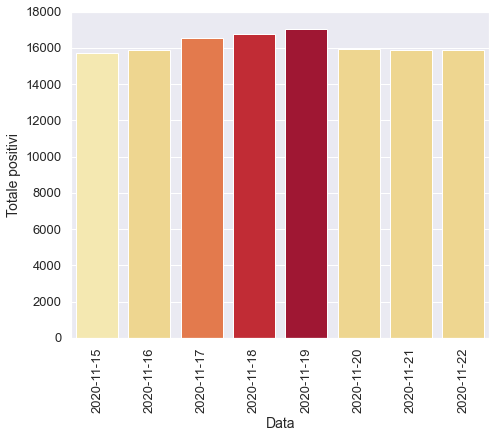

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

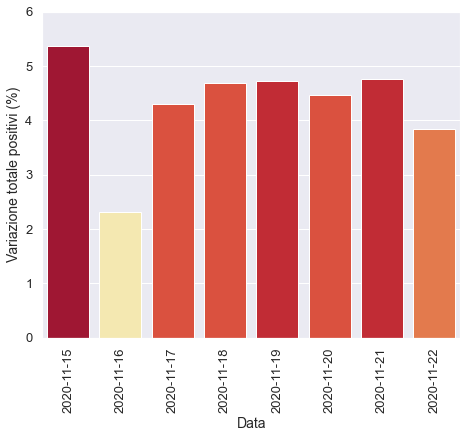

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

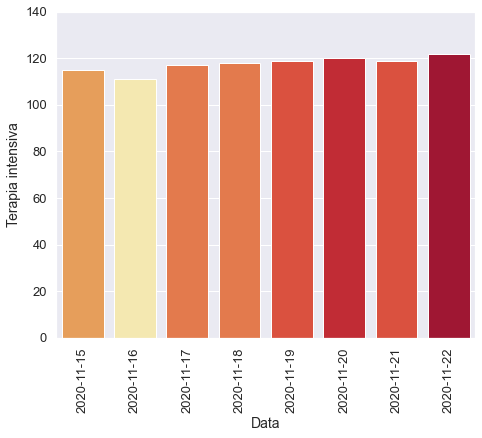

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

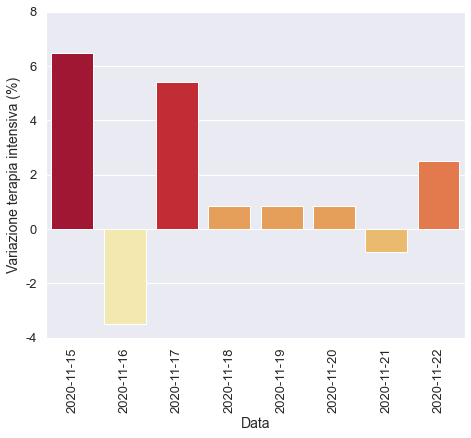

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

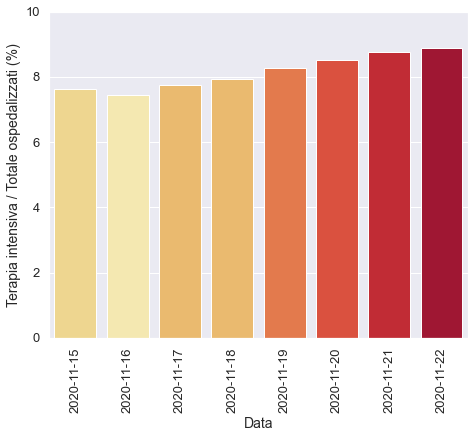

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

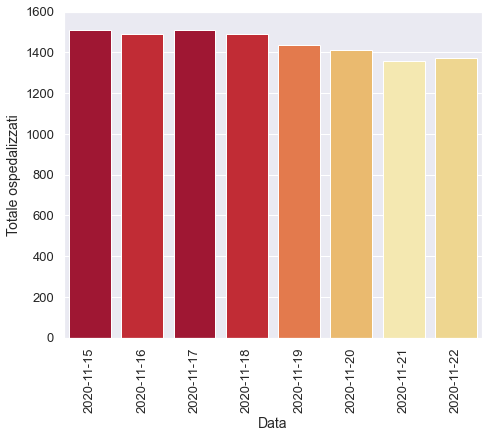

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

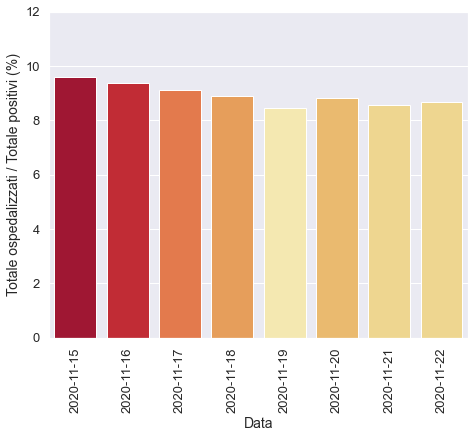

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

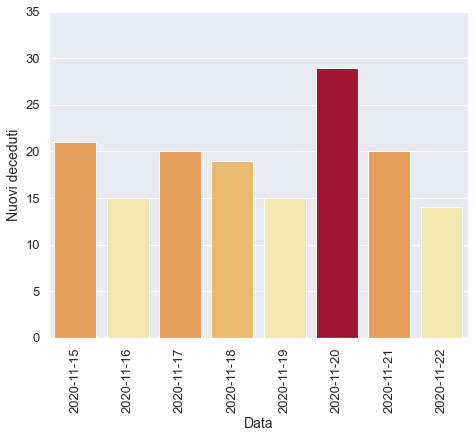

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

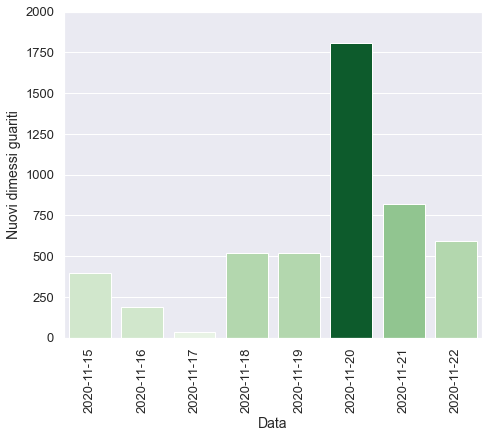

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)